# Logarithmic Scale Example
Example of using a logarithmic scale in a plot using Python’s matplotlib library.

We will use the Pareto distribution, which follows a power-law behavior:

$f(x) = \frac{\alpha}{x^{\alpha + 1}}, \quad x \geq 1$

NumPy’s `np.random.pareto(a)` generates samples from a related distribution with support $x \geq 0$, so we add $1$ to shift the values to match the standard Pareto form with $x \geq 1$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a large number of values (1e7) from a Pareto distribution.
# np.random.pareto(a, size) returns samples for x >= 0; adding 1 shifts it so that x >= 1.
N = 10**7
a = 2.0  # shape parameter; the resulting PDF is f(x) = a / x**(a + 1) = 2 / x^3
samples = np.random.pareto(a, size=N) + 1


Plot 1: Full-range linear histogram

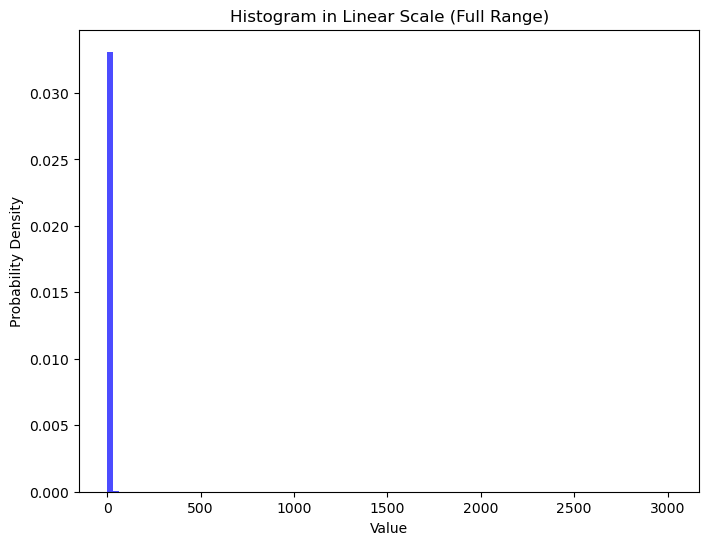

In [3]:
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=100, density=True, alpha=0.7, color='blue')
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Histogram in Linear Scale (Full Range)")
plt.show()


Plot 2: Zoomed linear histogram (range 1 to 10)

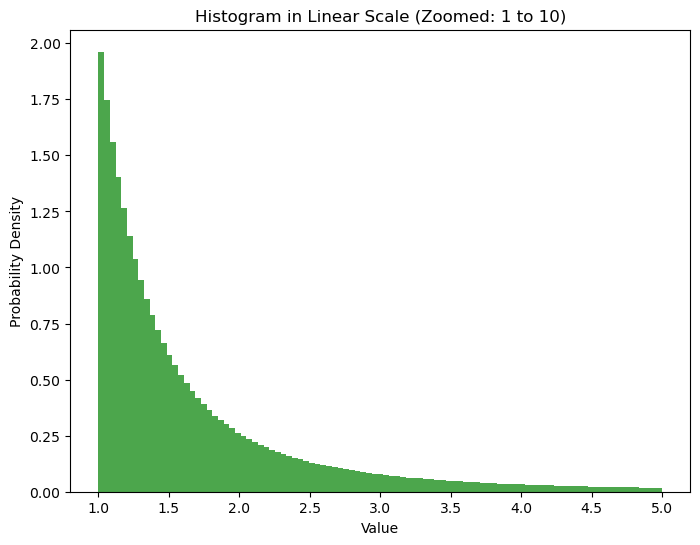

In [4]:
plt.figure(figsize=(8, 6))
bins = np.linspace(1, 5, 100)
plt.hist(samples, bins=bins, density=True, alpha=0.7, color='green')
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Histogram in Linear Scale (Zoomed: 1 to 10)")
plt.show()


Plot 3: Log-log histogram with logarithmically spaced bins

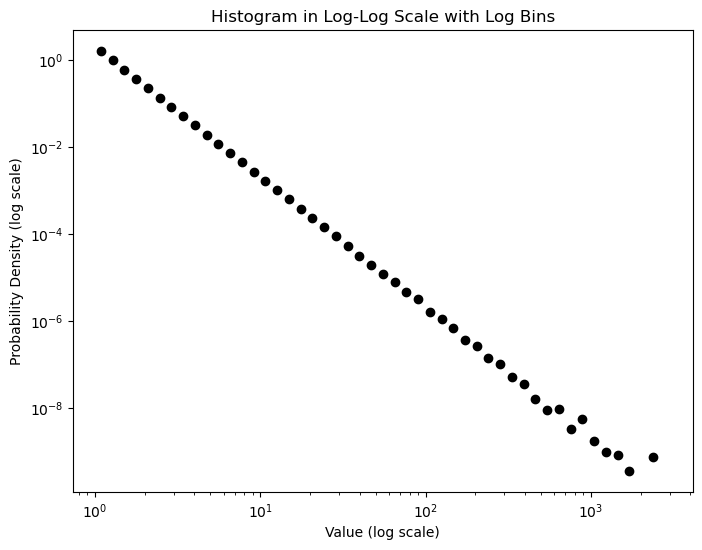

In [5]:
bins = np.logspace(np.log10(1), np.log10(samples.max()), 50)
plt.figure(figsize=(8, 6))
y, x = np.histogram(samples, bins=bins, density=True)
bin_centers = 0.5 * (x[:-1] + x[1:])
plt.scatter(bin_centers, y, marker='o', color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Value (log scale)")
plt.ylabel("Probability Density (log scale)")
plt.title("Histogram in Log-Log Scale with Log Bins")
plt.show()

# CDF
Let's try Cumulative Distribution Function (CDF) in log-log scale

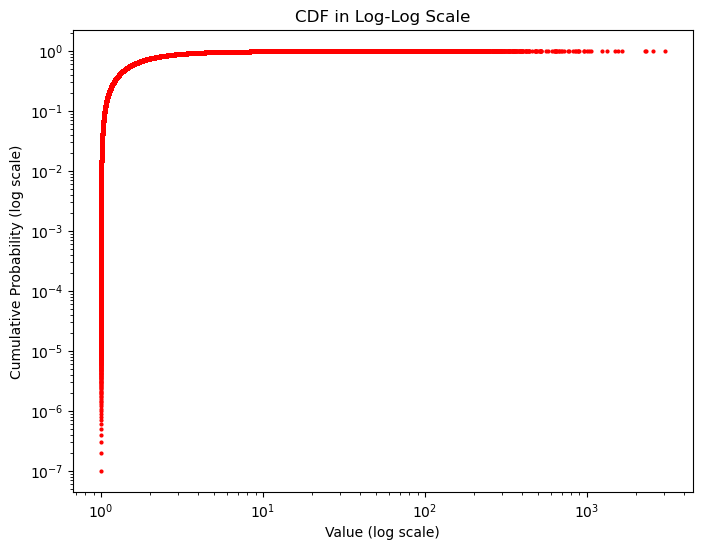

In [7]:
# # CDF
# Let's try Cumulative Distribution Function (CDF) in log-log scale

# Compute the CDF
sorted_samples = np.sort(samples)
cdf = np.arange(1, N + 1) / N  # CDF values
plt.figure(figsize=(8, 6))
plt.plot(sorted_samples, cdf, marker='o', linestyle='none', color='red', markersize=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Value (log scale)")
plt.ylabel("Cumulative Probability (log scale)")
plt.title("CDF in Log-Log Scale")
plt.show()

Was it helpful? Probably not.

### CCDF
Instead, let's plot the Complementary Cumulative Distribution Function (CCDF) in log-log scale, which is more meaningful for power-law distributions.

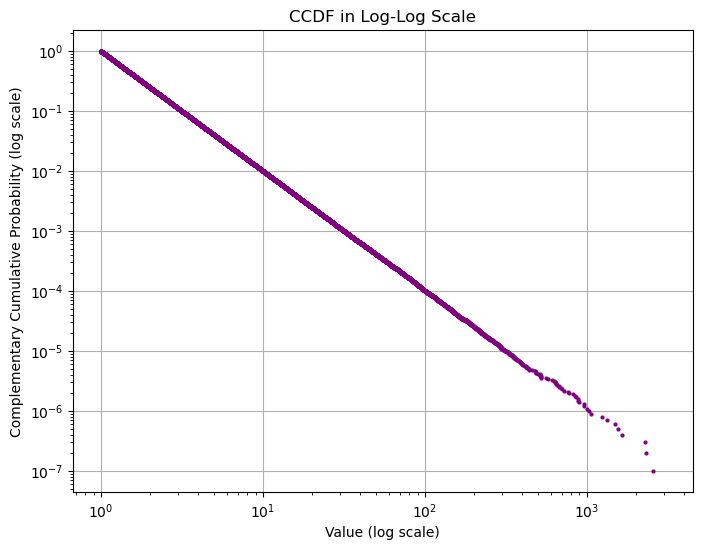

In [ ]:
# ### CCDF
# Instead, let's plot the Complementary Cumulative Distribution Function (CCDF) in log-log scale, which is more meaningful for power-law distributions.

# Compute the CCDF
# You can easily compute the CCDF from the CDF by subtracting it from 1.
ccdf = 1 - cdf  # CCDF values
plt.figure(figsize=(8, 6))
plt.plot(sorted_samples, ccdf, marker='o', linestyle='none', color='purple', markersize=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Value (log scale)")
plt.ylabel("Complementary Cumulative Probability (log scale)")
plt.title("CCDF in Log-Log Scale")
plt.grid(True)
plt.show()

What about now? Can you see the power-law behavior more clearly?